<a href="https://colab.research.google.com/github/shahdelmasry12/Data-Mining-Project/blob/main/ecommerce_customer_behavior_dataset_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load** **Data**

In [100]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [101]:
url="https://raw.githubusercontent.com/shahdelmasry12/Data-Mining-Project/refs/heads/main/ecommerce_customer_behavior_dataset_v2.csv"
df = pd.read_csv(url)
df.head()

,Order_ID,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating
0,ORD_000001-1,CUST_00001,2023-05-29,40,Male,Ankara,Books,29.18,1,0.00,29.18,Digital Wallet,Mobile,14,9,True,13,4
1,ORD_000001-2,CUST_00001,2023-10-12,40,Male,Ankara,Home & Garden,644.40,1,138.05,506.35,Credit Card,Desktop,14,8,True,6,2
2,ORD_000001-3,CUST_00001,2023-12-05,40,Male,Ankara,Sports,332.82,5,0.00,1664.10,Credit Card,Mobile,15,10,True,9,4
3,ORD_000002-1,CUST_00002,2023-05-11,33,Male,Istanbul,Food,69.30,5,71.05,275.45,Digital Wallet,Desktop,16,13,True,4,4
4,ORD_000002-2,CUST_00002,2023-06-16,33,Male,Istanbul,Beauty,178.15,3,0.00,534.45,Credit Card,Mobile,14,7,True,6,4


# **Cleaning** **Data**

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17049 entries, 0 to 17048
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Order_ID                  17049 non-null  object 
 1   Customer_ID               17049 non-null  object 
 2   Date                      17049 non-null  object 
 3   Age                       17049 non-null  int64  
 4   Gender                    17049 non-null  object 
 5   City                      17049 non-null  object 
 6   Product_Category          17049 non-null  object 
 7   Unit_Price                17049 non-null  float64
 8   Quantity                  17049 non-null  int64  
 9   Discount_Amount           17049 non-null  float64
 10  Total_Amount              17049 non-null  float64
 11  Payment_Method            17049 non-null  object 
 12  Device_Type               17049 non-null  object 
 13  Session_Duration_Minutes  17049 non-null  int64  
 14  Pages_

In [103]:
df.isnull().sum()

,0
Order_ID,0
Customer_ID,0
Date,0
Age,0
Gender,0
City,0
Product_Category,0
Unit_Price,0
Quantity,0
Discount_Amount,0


In [104]:
df.duplicated().sum()

np.int64(0)

In [105]:
for column in df.columns:
  print(f"{column} : {df[column].unique()}")
  print("*"*50)

Order_ID : ['ORD_000001-1' 'ORD_000001-2' 'ORD_000001-3' ... 'ORD_005000-2'
 'ORD_005000-3' 'ORD_005000-4']
**************************************************
Customer_ID : ['CUST_00001' 'CUST_00002' 'CUST_00003' ... 'CUST_04998' 'CUST_04999'
 'CUST_05000']
**************************************************
Date : ['2023-05-29' '2023-10-12' '2023-12-05' '2023-05-11' '2023-06-16'
 '2023-02-27' '2024-01-03' '2024-02-13' '2023-03-16' '2023-06-12'
 '2023-06-21' '2023-07-24' '2023-08-07' '2023-08-27' '2024-01-05'
 '2023-09-14' '2023-10-07' '2023-10-09' '2024-02-16' '2023-08-15'
 '2023-12-17' '2024-03-04' '2023-04-08' '2023-05-23' '2023-11-05'
 '2023-12-11' '2023-12-14' '2024-01-13' '2024-03-14' '2024-02-02'
 '2023-02-09' '2024-02-25' '2023-01-22' '2023-09-28' '2023-10-08'
 '2023-02-13' '2023-05-15' '2023-08-20' '2023-10-15' '2023-01-23'
 '2023-04-17' '2023-07-07' '2023-07-13' '2023-08-22' '2023-11-10'
 '2023-12-01' '2024-01-25' '2023-09-27' '2023-01-01' '2023-09-21'
 '2023-12-19' '2024-03-1

In [106]:
#To get the number of unique values for each Column
df.nunique()

,0
Order_ID,17049
Customer_ID,5000
Date,450
Age,57
Gender,3
City,10
Product_Category,8
Unit_Price,14711
Quantity,5
Discount_Amount,5526


In [107]:
df.describe()

,Age,Unit_Price,Quantity,Discount_Amount,Total_Amount,Session_Duration_Minutes,Pages_Viewed,Delivery_Time_Days,Customer_Rating
count,17049.000000,17049.000000,17049.000000,17049.000000,17049.000000,17049.000000,17049.000000,17049.000000,17049.000000
mean,34.945745,447.901689,3.011379,69.788135,1277.438711,14.535633,9.003109,6.503607,3.899408
std,11.046855,722.319705,1.417027,240.704662,2358.436375,2.925524,2.259954,3.488787,1.128803
min,18.000000,5.050000,1.000000,0.000000,6.210000,4.000000,1.000000,1.000000,1.000000
25%,26.000000,73.260000,2.000000,0.000000,172.970000,13.000000,7.000000,4.000000,3.000000
50%,35.000000,174.680000,3.000000,0.000000,455.850000,15.000000,9.000000,6.000000,4.000000
75%,42.000000,494.570000,4.000000,32.710000,1267.750000,17.000000,11.000000,8.000000,5.000000
max,75.000000,7900.010000,5.000000,6538.290000,37852.050000,26.000000,18.000000,25.000000,5.000000


In [108]:
df.describe(include='object')

,Order_ID,Customer_ID,Date,Gender,City,Product_Category,Payment_Method,Device_Type
count,17049,17049,17049,17049,17049,17049,17049,17049
unique,17049,5000,450,3,10,8,5,3
top,ORD_005000-4,CUST_02860,2023-07-29,Female,Istanbul,Sports,Credit Card,Mobile
freq,1,10,59,8613,4402,2248,6801,9543


In [109]:
df_cluster = df.drop(['Order_ID', 'Customer_ID', 'Date'], axis=1)
df_cluster

,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating
0,40,Male,Ankara,Books,29.18,1,0.00,29.18,Digital Wallet,Mobile,14,9,True,13,4
1,40,Male,Ankara,Home & Garden,644.40,1,138.05,506.35,Credit Card,Desktop,14,8,True,6,2
2,40,Male,Ankara,Sports,332.82,5,0.00,1664.10,Credit Card,Mobile,15,10,True,9,4
3,33,Male,Istanbul,Food,69.30,5,71.05,275.45,Digital Wallet,Desktop,16,13,True,4,4
4,33,Male,Istanbul,Beauty,178.15,3,0.00,534.45,Credit Card,Mobile,14,7,True,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17044,44,Male,Antalya,Beauty,68.65,2,0.00,137.30,Digital Wallet,Mobile,14,10,False,6,1
17045,24,Female,Eskisehir,Beauty,156.12,1,0.00,156.12,Credit Card,Mobile,15,8,True,7,5
17046,24,Female,Eskisehir,Home & Garden,1065.24,3,0.00,3195.72,Credit Card,Desktop,17,11,True,5,4
17047,24,Female,Eskisehir,Books,47.73,2,8.80,86.66,Credit Card,Desktop,13,11,True,12,2


In [110]:
df_cluster.columns

Index(['Age', 'Gender', 'City', 'Product_Category', 'Unit_Price', 'Quantity',
       'Discount_Amount', 'Total_Amount', 'Payment_Method', 'Device_Type',
       'Session_Duration_Minutes', 'Pages_Viewed', 'Is_Returning_Customer',
       'Delivery_Time_Days', 'Customer_Rating'],
      dtype='object')

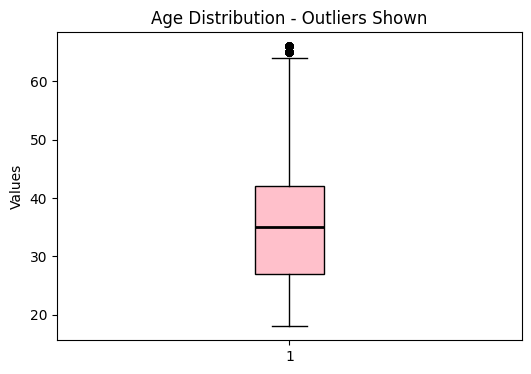

Missing values in Age: 0
Min/Max in Age: 18 / 66


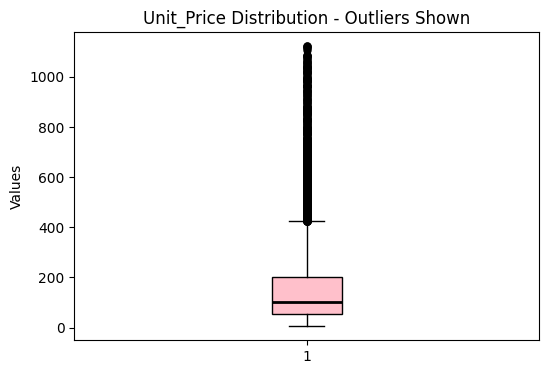

Missing values in Unit_Price: 0
Min/Max in Unit_Price: 5.05 / 1121.84


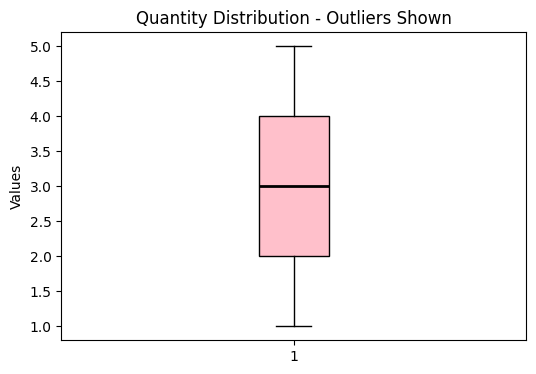

Missing values in Quantity: 0
Min/Max in Quantity: 1 / 5


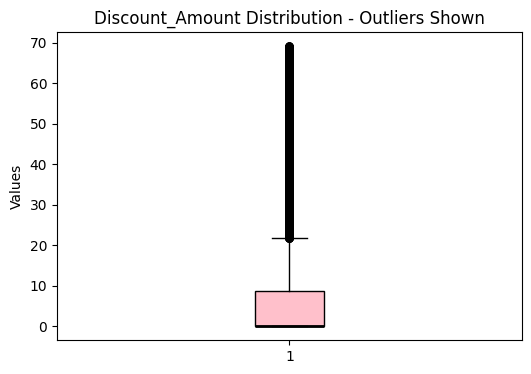

Missing values in Discount_Amount: 0
Min/Max in Discount_Amount: 0.0 / 69.15


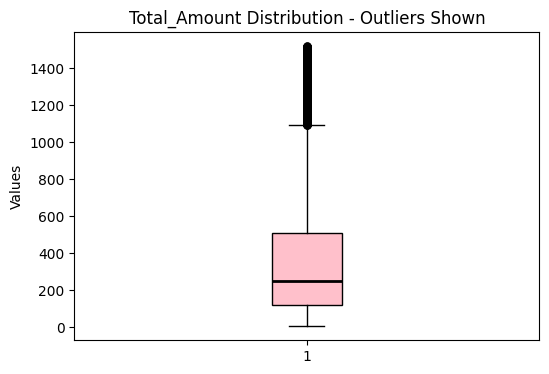

Missing values in Total_Amount: 0
Min/Max in Total_Amount: 6.21 / 1520.0


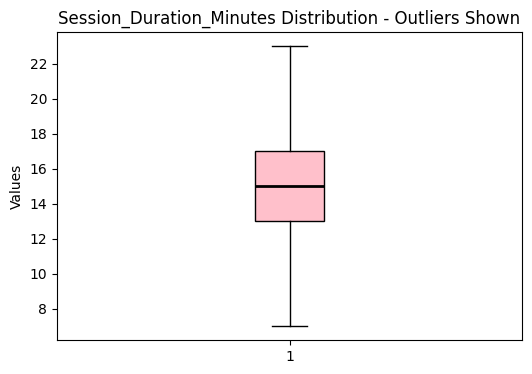

Missing values in Session_Duration_Minutes: 0
Min/Max in Session_Duration_Minutes: 7 / 23


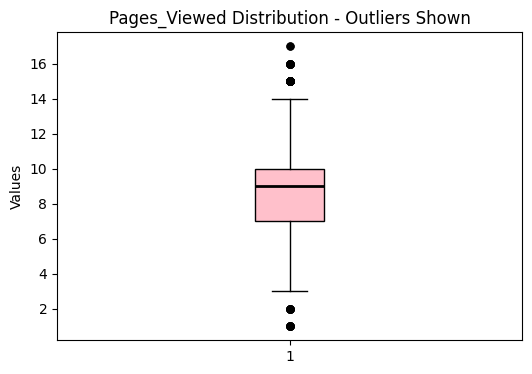

Missing values in Pages_Viewed: 0
Min/Max in Pages_Viewed: 1 / 17


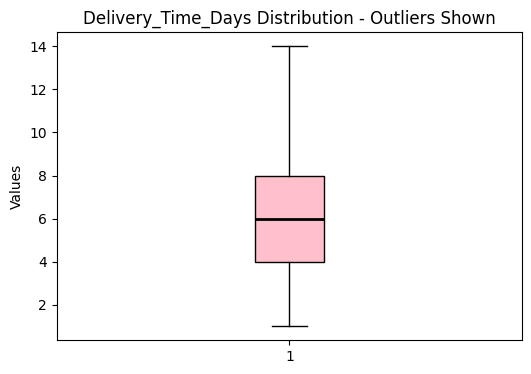

Missing values in Delivery_Time_Days: 0
Min/Max in Delivery_Time_Days: 1 / 14


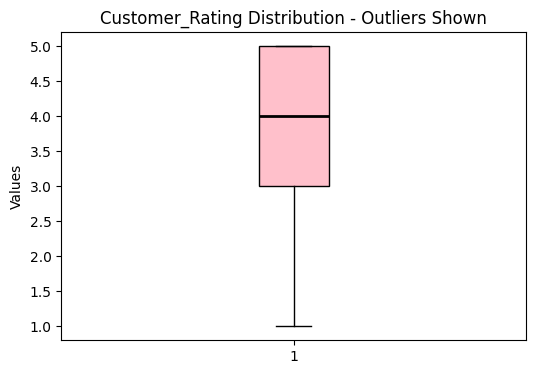

Missing values in Customer_Rating: 0
Min/Max in Customer_Rating: 1 / 5


In [115]:
numerical_cols = ['Age', 'Unit_Price', 'Quantity', 'Discount_Amount', 'Total_Amount',
                  'Session_Duration_Minutes', 'Pages_Viewed', 'Delivery_Time_Days', 'Customer_Rating']

for col in numerical_cols:
    plt.figure(figsize=(6,4))
    box = plt.boxplot(df[col], patch_artist=True,
                      boxprops=dict(facecolor='pink', color='black'),
                      medianprops=dict(color='black', linewidth=2),
                      flierprops=dict(marker='o', markerfacecolor='black', markersize=5, linestyle='none'))
    plt.title(f"{col} Distribution - Outliers Shown")
    plt.ylabel("Values")
    plt.show()
    print(f"Missing values in {col}: {df[col].isna().sum()}")
    print(f"Min/Max in {col}: {df[col].min()} / {df[col].max()}")

In [118]:
numerical_cols = ['Age', 'Unit_Price', 'Discount_Amount', 'Total_Amount','Pages_Viewed',]

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

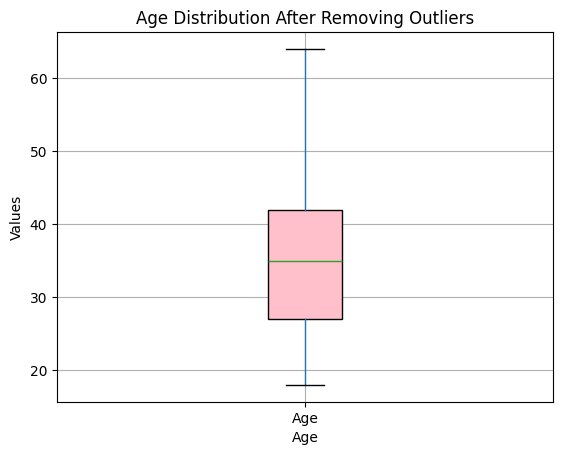

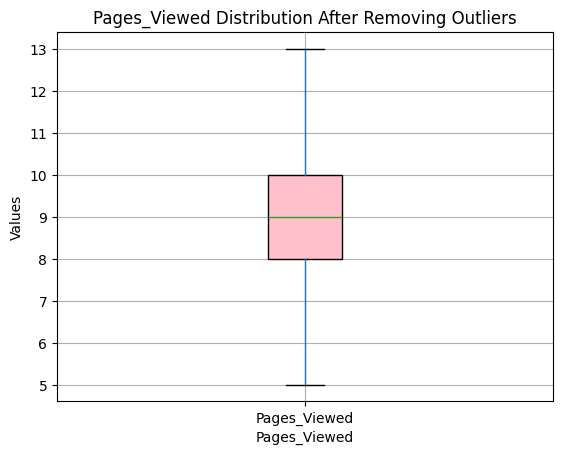

In [120]:
numerical_cols = ['Age','Pages_Viewed']
df_clean = df.copy()
for col in numerical_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
for col in numerical_cols:
    df_clean.boxplot(column=col, patch_artist=True, boxprops=dict(facecolor='pink'))
    plt.title(f"{col} Distribution After Removing Outliers")
    plt.xlabel(col)
    plt.ylabel("Values")
    plt.show()


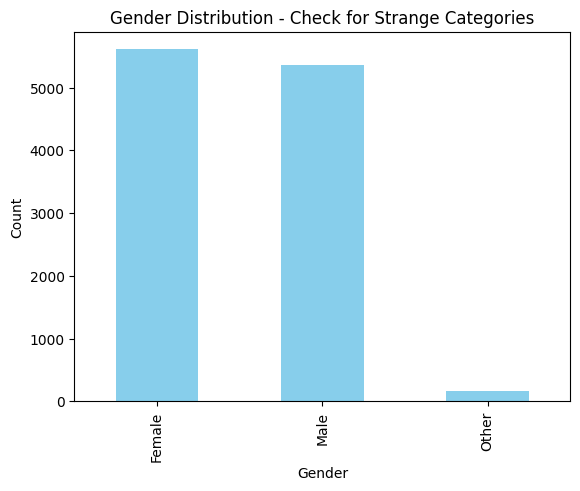

Unique values in Gender: ['Male' 'Female' 'Other']


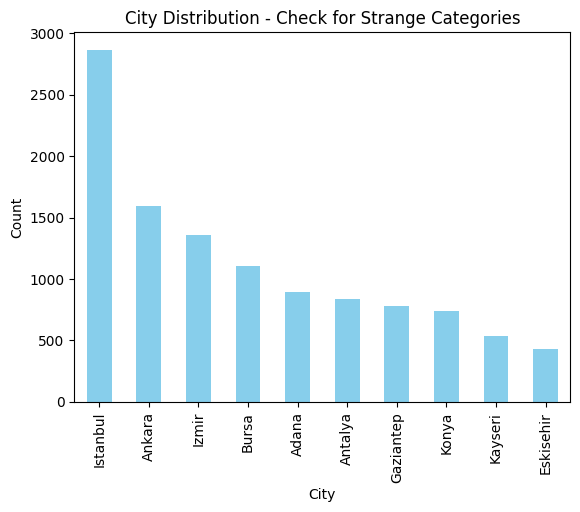

Unique values in City: ['Ankara' 'Istanbul' 'Konya' 'Kayseri' 'Bursa' 'Adana' 'Izmir' 'Eskisehir'
 'Antalya' 'Gaziantep']


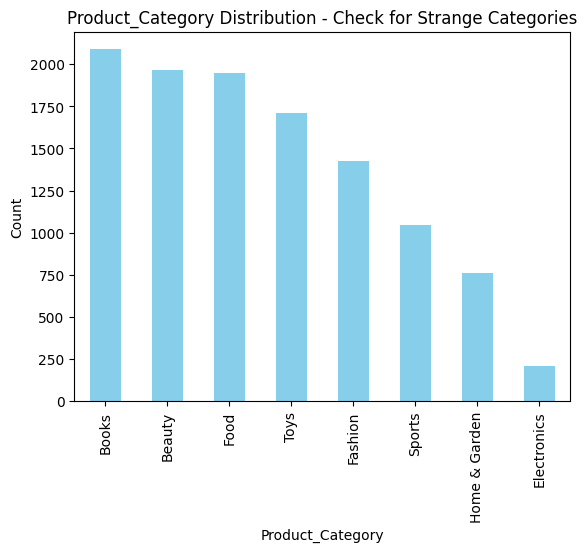

Unique values in Product_Category: ['Books' 'Beauty' 'Toys' 'Fashion' 'Food' 'Sports' 'Home & Garden'
 'Electronics']


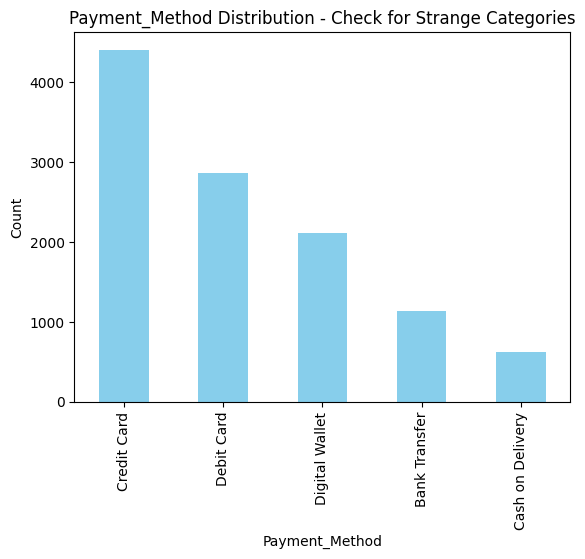

Unique values in Payment_Method: ['Digital Wallet' 'Credit Card' 'Debit Card' 'Cash on Delivery'
 'Bank Transfer']


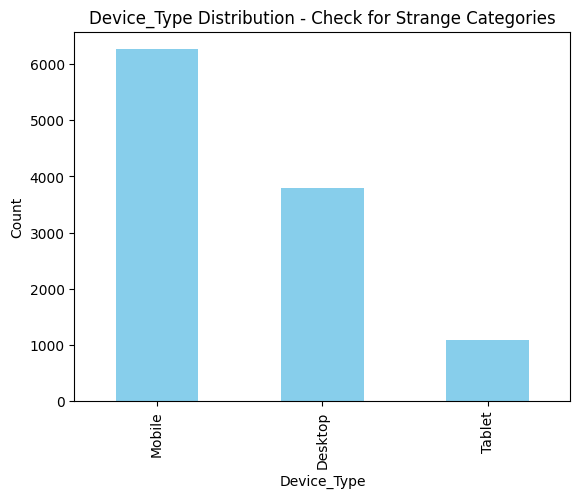

Unique values in Device_Type: ['Mobile' 'Tablet' 'Desktop']


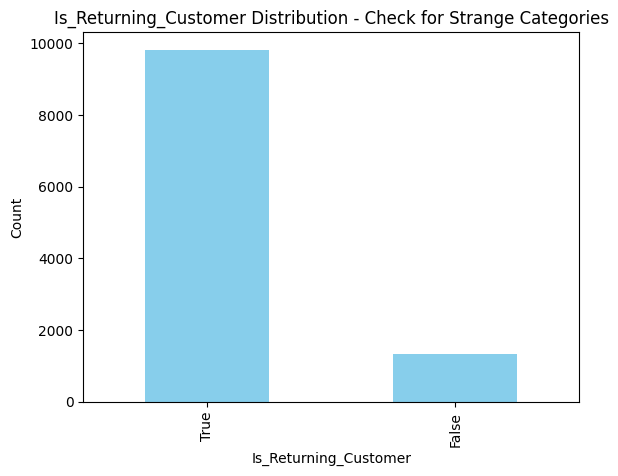

Unique values in Is_Returning_Customer: [ True False]


In [114]:
categorical_cols = ['Gender', 'City', 'Product_Category', 'Payment_Method', 'Device_Type', 'Is_Returning_Customer']

for col in categorical_cols:
    df[col].value_counts().plot(kind="bar", color='skyblue')
    plt.title(f"{col} Distribution - Check for Strange Categories")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()
    print(f"Unique values in {col}: {df[col].unique()}")


# **Visualization**